In [4]:
# - Data preprocessing (getting rid of stop words, etc.) 
# - Converting each row of data frame as a separate .txt file 

In [3]:
import pandas as pd
import os
import re
import numpy as np
import html
import nltk
import pycld2 as cld2
from nltk.corpus import words
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords



# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
[nltk_data] Downloading package wordnet to /home/bowenyi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/bowenyi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/bowenyi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /home/bowenyi/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [4]:
df = pd.read_csv("/shared/3/projects/benlitterer/podcastData/processed/floydMonth/floydMonthEn.csv", lineterminator='\n', low_memory=False)

In [5]:
df.shape[0]

789300

In [6]:
stop_words = set(stopwords.words('english'))

def remove_html_tags(text):
    clean = re.compile('<.*?>')
    text = re.sub(clean, '', text)  # Remove HTML tags
    text = html.unescape(text)  # Decode HTML entities
    return text

def remove_stop_words(input_txt):
    words = word_tokenize(input_txt)
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

def detect_english(text):
    try:
        reliable, bytes_found, details, vectors = cld2.detect(text, returnVectors=True)
        if details[0][0] == 'ENGLISH':
            return text
        else:
            return np.nan
    except:
        return np.nan

def remove_amp_words(input_txt):
    words = input_txt.split()
    words = [word for word in words if not word.startswith('&')]
    return ' '.join(words)

# Make a copy of the 'epDescription' column to 'clean_txt'
df['clean_txt'] = df['epDescription'].astype(str)

# Remove HTML tags
df['clean_txt'] = df['clean_txt'].apply(remove_html_tags)

# Remove URLs
df['clean_txt'] = df['clean_txt'].apply(lambda x: re.sub(r'https?://\S+|www\.\S+', '', x))

# Replace hyphens with underscores
df['clean_txt'] = df['clean_txt'].str.replace('-', '_')

# Remove ampersand words
df['clean_txt'] = df['clean_txt'].apply(remove_amp_words)

# Remove numbers 
df['clean_txt'] = df['clean_txt'].apply(lambda x: re.sub(r'[0-9]+', ' ', x))

# Detect non-English entries and drop them
df['clean_txt'] = df['clean_txt'].apply(detect_english)
df = df.dropna(subset=['clean_txt'])

# Remove punctuations and special characters
df['clean_txt'] = df['clean_txt'].apply(lambda x: re.sub(r'[^a-zA-Z\s_]+', ' ', x))

# Remove nbsp
df['clean_txt'] = df['clean_txt'].str.replace('nbsp', ' ')

# Remove stop words
df['clean_txt'] = df['clean_txt'].apply(remove_stop_words)

# Convert all to lower case
df['clean_txt'] = df['clean_txt'].str.lower()

# Replace blank string with NaN
df['clean_txt'] = df['clean_txt'].replace('', np.nan) 

# Remove any rows with NaN in 'clean_txt' column
df = df.dropna(subset=['clean_txt'])

In [17]:
# check podcast description based on what we got in topic_keys.txt: 
# print(df['rssUrl'][198093], '\n')
print('Before cleaning:', df['epDescription'][337768],'\n')
print('After cleaning:', df['clean_txt'][697813])

Before cleaning: <p>The Great Gildersleeve (1941-1957), initially written by Leonard Lewis Levinson, was one of broadcast history&#39;s earliest spin-off programs. Built around Throckmorton P. Gildersleeve, a character who had been a staple on the classic radio situation comedy Fibber McGee and Molly, The Great Gildersleeve enjoyed its greatest success in the 1940s. Actor Harold Peary played the character during its transition from the parent show into the spin-off and later in a quartet of feature films released at the height of the show&#39;s popularity. On Fibber McGee and Molly, Peary&#39;s Gildersleeve was a pompous windbag who became a consistent McGee nemesis. &#34;You&#39;re a haa-aa-aa-aard man, McGee!&#34; became a Gildersleeve catch phrase. The character was given several conflicting first names on Fibber McGee and Molly, and on one episode his middle name was revealed as Philharmonic. Gildy admits as much at the end of &#34;Gildersleeve&#39;s Diary&#34; on the Fibber McGee 

In [571]:
# Converting each row of data frame as a separate .txt file
# DON'T RUN UNLESS NECESSARY!!!!!!!
dir_name = "input-corpus"

# check if the directory exists. If not, create it
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

# iterate over DataFrame rows and write each one to a new file in the specified directory
for index, row in df.iterrows():
    with open(os.path.join(dir_name, f'podcast_description_{index}.txt'), 'w', encoding='utf-8') as file:
        file.write(row['clean_txt'])

In [9]:
# some code to check if conversion was done properly:
# print out NaN counts in 'clean_txt' column
nan_count = df['clean_txt'].isna().sum()
print(f"Number of NaN values in 'clean_txt' column: {nan_count}")
shape = df.shape[0]
print('The data frame size is: ', shape)

# print file counts in "clean_descriptions"
dir_name = "input-descriptions"
num_files = len(os.listdir(dir_name))
print(f"Number of files in '{dir_name}': {num_files}")

print('Data frame size same as number of files: ', shape==num_files)

Number of NaN values in 'clean_txt' column: 0
The data frame size is:  684013
Number of files in 'input-descriptions': 684013
Data frame size same as number of files:  True


In [569]:
df[df['clean_txt'].str.contains('apos')].index.tolist()[:10]

[564, 738, 739, 2037, 2375, 2376, 2377, 2378, 3060, 3067]

In [556]:
# import re
# import numpy as np
# import pycld2 as cld2
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# import html

# stop_words = set(stopwords.words('english'))

# def remove_html_tags(text):
#     clean = re.compile('<.*?>')
#     text = re.sub(clean, '', text)  # Remove HTML tags
#     text = html.unescape(text)  # Decode HTML entities
#     return text

# def remove_stop_words(input_txt):
#     words = word_tokenize(input_txt)
#     words = [word for word in words if word.lower() not in stop_words]
#     return ' '.join(words)

# def detect_english(text):
#     try:
#         reliable, bytes_found, details, vectors = cld2.detect(text, returnVectors=True)
#         if details[0][0] == 'ENGLISH':
#             return text
#         else:
#             return np.nan
#     except:
#         return np.nan

# def remove_amp_words(input_txt):
#     words = input_txt.split()
#     words = [word for word in words if not word.startswith('&')]
#     return ' '.join(words)

# # Taking the text of df['epDescription'][1] in a variable
# text = df['epDescription'][94]

# # Remove HTML tags and decode HTML entities
# text = remove_html_tags(text)

# # Remove URLs
# text = re.sub(r'https?://\S+|www\.\S+', ' ', text)

# # Replace hyphens with underscores
# text = text.replace('-', '_')

# # Remove ampersand words
# text = remove_amp_words(text)

# # Remove numbers 
# text = re.sub(r'[0-9]+', ' ', text)

# # Detect non-English entries and set them as NaN
# text = detect_english(text)

# # Drop the text if it is NaN
# if text is np.nan:
#     raise ValueError("The text is not in English.")

# # Remove punctuations and special characters
# text = re.sub(r'[^a-zA-Z\s_]+', ' ', text)

# # Remove nbsp
# text = text.replace('nbsp', ' ')

# # Remove stop words
# text = remove_stop_words(text)

# # Convert all to lower case
# text = text.lower()

# # Replace blank string with NaN
# if text == '':
#     text = np.nan

# # Print the cleaned text
# print("raw text: ", df['epDescription'][94])
# print("cleaned text: ", text)




raw text:  <p>Luck and Mike back from the DadGab studios this week! The two give their overall impressions of &quot;The Last Dance&quot; and who comes off the best/worst and how is Jordan perceived now. The guys also discuss Food! They delve into what food is like during the quarantine period and how they have adapted to it. All of that plus much, much more!  Make sure to refer your friends for a special prize!</p>
cleaned text:  luck mike back dadgab studios week two give overall impressions last dance comes best worst jordan perceived guys also discuss food delve food like quarantine period adapted plus much much make sure refer friends special prize


In [46]:
df_key = pd.read_csv("keywords.txt", sep="\t", header=None)
df_key.columns = ['Weight', 'Category']

In [47]:
df_sorted = df_key.sort_values(by='Weight', ascending=False)
df_top20 = df_sorted.head(20)

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.barplot(x='Weight', y='Category', data=df_top20)
plt.title('Top 20 categories by weight, modeled on podcast descriptions')
plt.tight_layout()
plt.savefig("top_20_topics_keywords.jpg")
plt.show()

In [67]:
df_keywords_graph = pd.read_csv("topics-keys.txt", sep="\t", header=None)
df_keywords_graph.columns = ['index','Weight', 'Keywords']

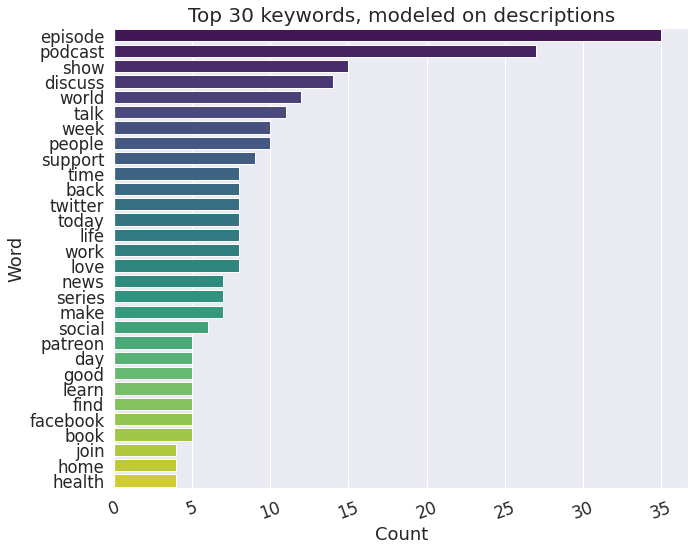

In [75]:
# Importing Required Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

corpus = []
for disclosures in df_keywords_graph['Keywords'].tolist():
    for word in disclosures.split():
        corpus.append(word)

# Bar plot - Create a dataframe of the most common 30 words
common_words = pd.DataFrame(Counter(corpus).most_common(30))    # limit the common words to 30
common_words.columns = ('Word', 'Count')

# Plot a bar chart of the most common 30 words
plt.figure(figsize=(10,8))    # Increasing figure size for better visualization
sns.set(font_scale = 1.5)
sns.barplot(x= common_words['Count'], y=common_words['Word'], palette = 'viridis')    # flip the x and y for easier reading
plt.xticks(rotation=20)
plt.title("Top 30 keywords, modeled on descriptions", fontsize = 20)
plt.tight_layout()
plt.savefig("top_30_keywords.jpg")
plt.show()

In [77]:
df.head(10)

,Unnamed: 0,rssUrl,epTitle,epDescription,duration,pubDate,copyright,itunes:type,itunes:complete,guid,...,category6,category7,category8,category9,category10,newestEnclosureDuration,oldestItemDatetime,cleanDates,cleanDatesLoc,clean_txt
0,56,https://feeds.buzzsprout.com/783020.rss,Stop The World,<p>Simon talks about the turning of the world ...,405,"Sun, 07 Jun 2020 21:00:00 +1000",NaN,NaN,NaN,Buzzsprout-4072346,...,self improvement,NaN,NaN,NaN,NaN,0.0,2020-01-04 04:00:00,2020-06-07 21:00:00+10:00,2020-06-07 21:00:00,simon talks turning world song cowrote recorde...
1,57,https://feeds.buzzsprout.com/783020.rss,Today Is Yesterday,"<p>Simon introduces track 4, of the newly rele...",416,"Sun, 31 May 2020 21:00:00 +1000",NaN,NaN,NaN,Buzzsprout-3983942,...,self improvement,NaN,NaN,NaN,NaN,0.0,2020-01-04 04:00:00,2020-05-31 21:00:00+10:00,2020-05-31 21:00:00,simon introduces track newly released kistone ...
2,58,https://feeds.buzzsprout.com/783020.rss,Saturn Return,"<p>This week, Simon introduces track 2- Saturn...",476,"Sun, 24 May 2020 19:00:00 +1000",NaN,NaN,NaN,Buzzsprout-3892169,...,self improvement,NaN,NaN,NaN,NaN,0.0,2020-01-04 04:00:00,2020-05-24 19:00:00+10:00,2020-05-24 19:00:00,week simon introduces track _ saturn return ki...
3,59,https://feeds.buzzsprout.com/783020.rss,Quarterlife Crisis,<p>Big news week. The band Simon lived in the ...,509,"Sun, 17 May 2020 20:00:00 +1000",NaN,NaN,NaN,Buzzsprout-3791501,...,self improvement,NaN,NaN,NaN,NaN,0.0,2020-01-04 04:00:00,2020-05-17 20:00:00+10:00,2020-05-17 20:00:00,big news week band simon lived usa kistone rel...
4,116,https://brazeneducation.podbean.com/feed.xml,BE: Episode 37 - The Benefits of Homeschooling...,<p>Listen as Educator Barnes talks to Natalie ...,57:00,"Sun, 24 May 2020 21:39:35 -0400",NaN,NaN,NaN,brazeneducation.podbean.com/0de5429d-f374-54ed...,...,NaN,NaN,NaN,NaN,NaN,2794.0,2018-12-31 13:00:18,2020-05-24 21:39:35-04:00,2020-05-24 21:39:35,listen educator barnes talks natalie pipkin ho...
5,207,https://feeds.soundcloud.com/users/soundcloud:...,Episode 33 'California’s Higher Education Lan...,It’s no secret that the COVID-19 pandemic has ...,00:25:58,"Fri, 22 May 2020 18:25:44 +0000",NaN,NaN,NaN,"tag:soundcloud,2010:tracks/816510397",...,NaN,NaN,NaN,NaN,NaN,2173.0,2017-06-24 08:41:20,2020-05-22 18:25:44+00:00,2020-05-22 18:25:44,secret covid_ pandemic made huge impact higher...
6,425,https://www.samologo.com.ng/feed/podcast/,Ohun Aanu Episode 249,Topic: Awon kan mbe ninu aye yi Description: 2...,17:53 mins,"Sun, 07 Jun 2020 20:52:36 +0000",NaN,NaN,NaN,https://www.samologo.com.ng/?p=5378,...,NaN,NaN,NaN,NaN,NaN,1140.0,2018-07-01 19:28:33,2020-06-07 20:52:36+00:00,2020-06-07 20:52:36,topic awon kan mbe ninu aye yi description tim...
7,426,https://www.samologo.com.ng/feed/podcast/,Ohun Aanu Episode 248,Title: Olorun to gbin o s’ori ile yi Descripti...,16:46 mins,"Sun, 31 May 2020 18:48:29 +0000",NaN,NaN,NaN,https://www.samologo.com.ng/?p=5342,...,NaN,NaN,NaN,NaN,NaN,1140.0,2018-07-01 19:28:33,2020-05-31 18:48:29+00:00,2020-05-31 18:48:29,title olorun gbin ori ile yi description isa w...
8,427,https://www.samologo.com.ng/feed/podcast/,Ohun Aanu Episode 247,"Title: Eru nba mi, f’ojo ‘waju esin Kristi Des...",17:15 mins,"Sun, 24 May 2020 19:43:57 +0000",NaN,NaN,NaN,https://www.samologo.com.ng/?p=5335,...,NaN,NaN,NaN,NaN,NaN,1140.0,2018-07-01 19:28:33,2020-05-24 19:43:57+00:00,2020-05-24 19:43:57,title eru nba mi f ojo waju esin kristi descri...
9,428,https://www.samologo.com.ng/feed/podcast/,Ohun Aanu Episode 246,Title: B’elese ba nj’iya Description: Col 3:22...,16:36 mins,"Sun, 17 May 2020 19:06:43 +0000",NaN,NaN,NaN,https://www.samologo.com.ng/?p=5329,...,NaN,NaN,NaN,NaN,NaN,1140.0,2018-07-01 19:28:33,2020-05-17 19:06:43+00:00,2020-05-17 19:06:43,title b elese ba nj iya description col bondse...
